In [71]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
pd.set_option('display.max_columns', 999)

In [27]:
df = pd.read_csv("covtype.csv")
# df.info()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [94]:
soil_columns = df.iloc[:,range(-42,-2)].columns

In [95]:
for col in soil_columns:
    ting = df.loc[df[col]==1,:]
df_Soil_Type2

SyntaxError: can't assign to function call (<ipython-input-95-8bd60a4fe7c6>, line 2)

In [28]:
df_wilderness_area_1 = df.loc[df['Wilderness_Area1']==1,:]
df_wilderness_area_2 = df.loc[df['Wilderness_Area2']==1,:]
df_wilderness_area_3 = df.loc[df['Wilderness_Area3']==1,:]
df_wilderness_area_4 = df.loc[df['Wilderness_Area4']==1,:]

In [33]:
df_wilderness_area_1['Wilderness_Area']=1
df_wilderness_area_2['Wilderness_Area']=2
df_wilderness_area_3['Wilderness_Area']=3
df_wilderness_area_4['Wilderness_Area']=4

/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/flatironschool/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [47]:
dataframes=[df_wilderness_area_1,df_wilderness_area_2,df_wilderness_area_3,df_wilderness_area_4]
df = pd.concat(dataframes).drop(columns=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])

In [51]:
df.Wilderness_Area.value_counts()
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Wilderness_Area
0,2596,51,3,258,0,510,221,232,148,6279,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1
1,2590,56,2,212,-6,390,220,235,151,6225,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1
2,2804,139,9,268,65,3180,234,238,135,6121,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,2785,155,18,242,118,3090,238,238,122,6211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1
4,2595,45,2,153,-1,391,220,234,150,6172,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,1


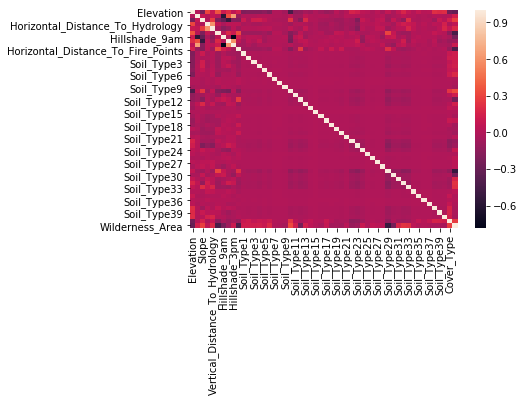

In [86]:
sns.heatmap(df.corr())

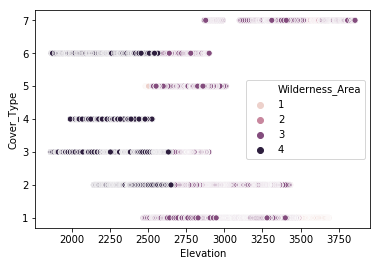

In [60]:
sns.scatterplot(data=df,hue='Wilderness_Area',y='Cover_Type',x='Elevation')

In [56]:
df_covergroups_mean = df.groupby('Cover_Type').mean()

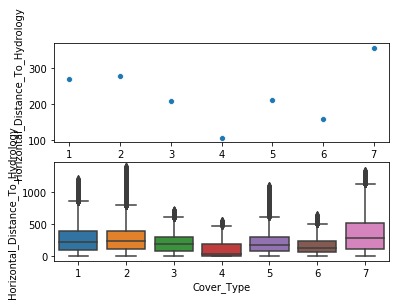

In [77]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Hydrology",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Hydrology",ax=axes[1])



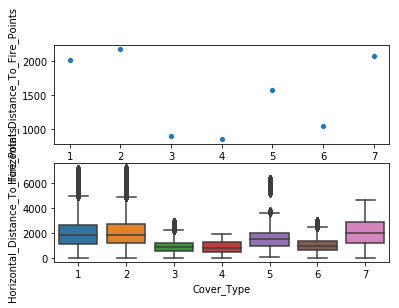

In [81]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Fire_Points",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Fire_Points",ax=axes[1])

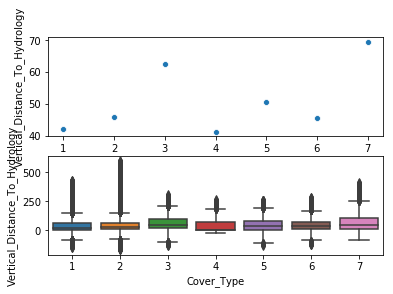

In [79]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Vertical_Distance_To_Hydrology",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Vertical_Distance_To_Hydrology",ax=axes[1])

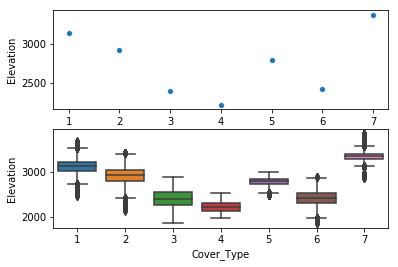

In [80]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Elevation",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Elevation",ax=axes[1])

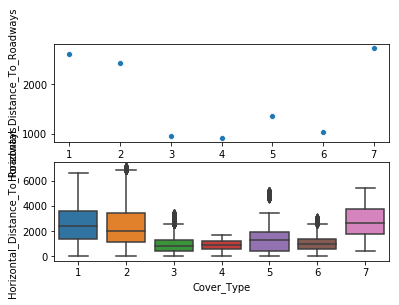

In [98]:
f, axes = plt.subplots(2, 1)

sns.scatterplot(data=df_covergroups_mean,x=df_covergroups_mean.index,y="Horizontal_Distance_To_Roadways",ax=axes[0])
sns.boxplot(data=df,x=df.Cover_Type,y="Horizontal_Distance_To_Roadways",ax=axes[1])